# Example: Fit an experimental (or theoretical) dispersion curve to the propagation constants Taylor Series expansion to implement in fiberdesk

import pandas as pd

In [48]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [49]:
name = 'dispersion.csv'

_encoding = "utf-8"
with open(name) as _file:
    _encoding = _file.encoding
    print(_encoding)

df = pd.read_csv(name, encoding = _encoding, delimiter=";", decimal=",")
print (df)

UTF-8
    lambda in nm  D in ps/nm/km
0        666.967      -228.2150
1        675.608      -217.8070
2        684.248      -207.4000
3        691.809      -198.4800
4        699.370      -190.0550
..           ...            ...
64      1616.380        66.3648
65      1636.900        67.3478
66      1657.430        68.6000
67      1673.630        69.3157
68      1696.310        70.2978

[69 rows x 2 columns]


Plot the experimental data.

Text(0, 0.5, 'D / ps/km/nm')

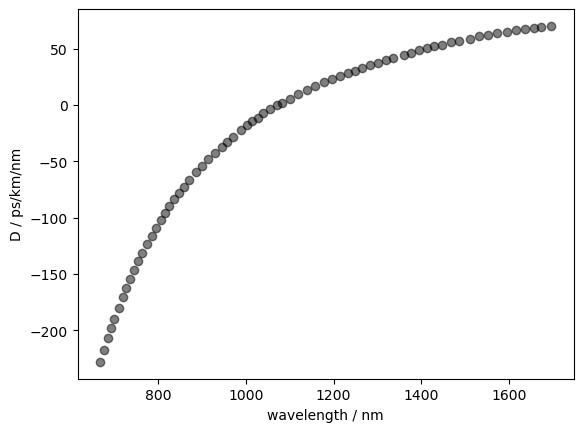

In [50]:
disp = df.to_numpy()

wavelength_values = disp[:,0]
dispersion_values = disp[:,1]

print()
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(wavelength_values,dispersion_values,'o',color='black',alpha=0.5)
ax0.set_xlabel('wavelength / nm')
ax0.set_ylabel('D / ps/km/nm')

In [51]:
import math as m
from scipy.optimize import curve_fit

In [52]:
fit_wavelength = 1064.0*1e-9
c = 299792458.0 #m/s
omega0 = c/fit_wavelength*2*m.pi

# Define the Taylor fit function
def Taylor(omega,omega0,beta2s):
    y = 0.0
    n = 0
    for b in beta2s:        
        y += 1.0/m.factorial(n)*b*(omega-omega0)^(n)
        n += 1
    return y

In [53]:
omega_axis = 3e9 / wavelength_values * 2 * m.pi
beta2_values = - dispersion_values / 2 / m.pi / c * wavelength_values**2

results, covariance = curve_fit(Taylor, omega_axis, beta2_values, p0=[[1,1]])

TypeError: 'numpy.float64' object is not iterable